# Lab 3 - Basic concepts in Machine Learning
### Author: [Yunting Chiu](https://www.linkedin.com/in/yuntingchiu/)
## Exercise 1
Write a Python program to reproduce the results and figures of Example 3.6 page 98. Play with the number of training points, the degrees of the involved polynomials, and the noise variance in the regression model.


## Install the Packages


In [1]:
# Install the related libraries
#%matplotlib inline
import matplotlib as plt
import numpy as np
import math
from scipy.io import savemat

In [2]:
# generate the ground turth
def generate_ground(x):
  ground = 0.1+0.6*x+0.5*x**2-0.8*x**3+0.2*x**4+0.3*x**5
  return ground

In [3]:
def betahistory(order):
  N = 10
  x = np.linspace(-1, 1, num = N) # from -1 to 1 with N numbers
  noise = np.sqrt(0.3)*np.random.standard_normal(N) # add the noise term for each N
  ground = generate_ground(x)
  y = ground + noise 
  if order == 2:
    X = np.array([np.ones(N), x, x**2]).T # 3 columns
  elif order == 5:
    X = np.array([np.ones(N), x, x**2, x**3, x**4, x**5]).T # 3 columns
  elif order == 8:
    X = np.array([np.ones(N), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8]).T
  Y = np.array([y]).T
  beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y)) # the LS estimate
  savebeta = beta
  # 1000 samples, and noise = 0.3
  for i in range(1000):
    noise = np.sqrt(0.3)*np.random.standard_normal(N)
    y = ground + noise
    Y = np.array([y]).T
    beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    savebeta = np.concatenate((savebeta, beta), axis = 1)
  beta = np.mean(savebeta, axis = 1)
  return beta, savebeta

In [4]:
def plot1000(order, x_plot, beta):
# plot depending on the order
  if order == 2:
    y_plot = np.dot(np.array([np.ones(10000), x_plot, x_plot**2]).T, beta)
  elif order == 5:
    y_plot = np.dot(np.array([np.ones(10000), x_plot, x_plot**2, x_plot**3, x_plot**4, x_plot**5]).T, beta)
  elif order == 8:
    y_plot = np.dot(np.array([np.ones(10000), x_plot, x_plot**2, x_plot**3, x_plot**4, x_plot**5, x_plot**6, x_plot**7, x_plot**8]).T, beta)
  return y_plot

beta2, beta2history = betahistory(2)
beta5, beta5history = betahistory(5)
beta8, beta8history = betahistory(8)
print(beta2, beta5, beta8)

[0.09158041 0.19580444 0.67138072] [ 0.10327021  0.64993815  0.53712293 -0.93282484  0.18114015  0.36554852] [ 0.09356723  0.66052057  1.06757936 -1.1351309  -3.99148453  0.81834097
  8.06424773 -0.2593971  -4.41622401]


# Visualize the plots 
- As we can see, the red curve is 2nd degree polynomial, the yellow curve is 5th degree polynomial, the blue curve is 8th degree polynomial, and the green curve is the ground turth. 

- The 5th and 8th degree polynomial is really closed to the ground turth.


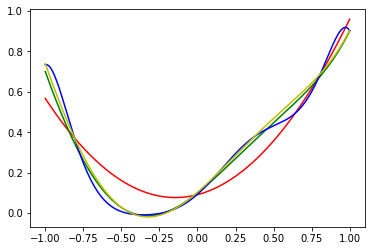

In [5]:
x_plot = np.linspace(-1, 1, num = 10000)
y_plot2 = plot1000(2, x_plot, beta2)
y_plot5 = plot1000(5, x_plot, beta5)
y_plot8 = plot1000(8, x_plot, beta8)

#plt.figure(1)
plt.pyplot.plot(x_plot, y_plot2,'r', x_plot, generate_ground(x_plot), 'g', x_plot, y_plot8, 'b',  x_plot, y_plot5, 'y') # g = green, r = red, b = blue

The first ten beta with 2nd, 5th, and 8th degrees, respectively. 

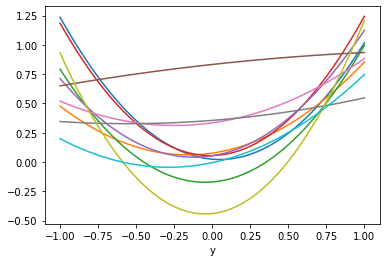

In [6]:
for i in range(10):
  plt.pyplot.plot(x_plot, plot1000(2, x_plot, beta2history[:, i]))
plt.pyplot.xlabel('x')
plt.pyplot.xlabel('y')
plt.pyplot.show()

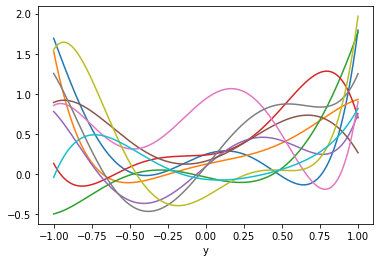

In [7]:
for i in range(10):
  plt.pyplot.plot(x_plot, plot1000(5, x_plot, beta5history[:, i]))
plt.pyplot.xlabel('x')
plt.pyplot.xlabel('y')
plt.pyplot.show()

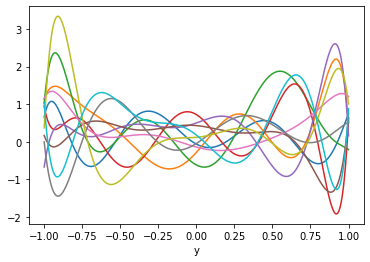

In [8]:
for i in range(10):
  plt.pyplot.plot(x_plot, plot1000(8, x_plot, beta8history[:, i]))
plt.pyplot.xlabel('x')
plt.pyplot.xlabel('y')
plt.pyplot.show()

In conclusion, a large polynomial order model always reduce the training error. However, it tends to perform worse (overfitting) than the original model. We need to find out the **sweet point** in order to optimal the low bias and low variance.

# Testing Zone


In [9]:
"""
# print(np.linspace(-1, 1, num = 10))
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print(b.T)
np.concatenate((a, b.T), axis=1)
noise = np.sqrt(0.3)*np.random.standard_normal(10)
print(noise)
"""

'\n# print(np.linspace(-1, 1, num = 10))\na = np.array([[1, 2], [3, 4]])\nb = np.array([[5, 6]])\nprint(b.T)\nnp.concatenate((a, b.T), axis=1)\nnoise = np.sqrt(0.3)*np.random.standard_normal(10)\nprint(noise)\n'

# Output

In [11]:
# should access the Google Drive files before running the chunk
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic 
!jupyter nbconvert --to pdf "/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/GitHub/Labs/03/Lab3_Yunting.ipynb"